In [30]:
from sklearn.datasets import fetch_lfw_people

In [49]:
face_data = fetch_lfw_people(min_faces_per_person=80)

In [50]:
X = face_data.data
Y = face_data.target

In [51]:
print('Input data size :', X.shape)

Input data size : (1140, 2914)


In [52]:
print('Output data size :', Y.shape)

Output data size : (1140,)


In [53]:
print('Label names:', face_data.target_names)

Label names: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [54]:
for i in range(5):
    print(f'Class {i} has {(Y == i).sum()} samples.')

Class 0 has 236 samples.
Class 1 has 121 samples.
Class 2 has 530 samples.
Class 3 has 109 samples.
Class 4 has 144 samples.


In [55]:
import matplotlib.pyplot as plt

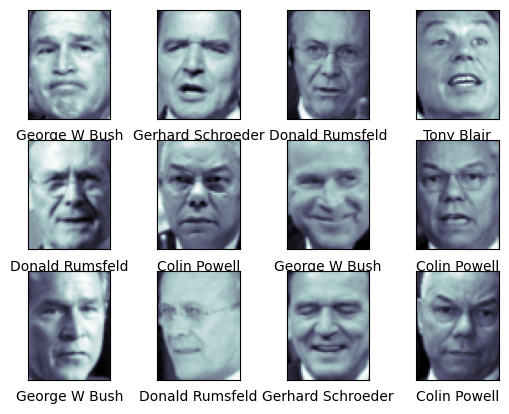

In [56]:
fig, ax = plt.subplots(3,4)
for i, axi in enumerate(ax.flat):
    axi.imshow(face_data.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=face_data.target_names[face_data.target[i]])
    
plt.show()

In [62]:
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
clf = SVC(class_weight='balanced', random_state=42)


In [64]:
parameters = {
    'C' : [0.1, 1, 10],
    'gamma': [1e-07, 1e-08, 1e-06],
    'kernel': ['rbf', 'linear']
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1e-07, 1e-08, 1e-06],
                         'kernel': ['rbf', 'linear']})

In [66]:
print('The best model:\n', grid_search.best_params_)

The best model:
 {'C': 10, 'gamma': 1e-07, 'kernel': 'rbf'}


In [67]:
print('The best averaged performance:', grid_search.best_score_)

The best averaged performance: 0.8514619883040936


In [68]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test)

print(f'The accuracy is: {clf_best.score(X_test, Y_test)*100:.1f}%')

The accuracy is: 87.7%


In [70]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred, target_names=face_data.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.89      0.88      0.88        64
  Donald Rumsfeld       0.84      0.81      0.83        32
    George W Bush       0.88      0.93      0.90       127
Gerhard Schroeder       0.84      0.72      0.78        29
       Tony Blair       0.91      0.88      0.89        33

         accuracy                           0.88       285
        macro avg       0.87      0.84      0.86       285
     weighted avg       0.88      0.88      0.88       285

